<a href="https://colab.research.google.com/github/HoanDiep/BT4_Fuzzy_Tri_tue_nhan_tao/blob/main/bt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

5.999999998053693


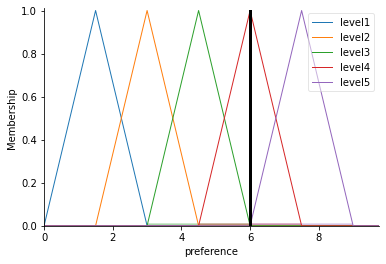

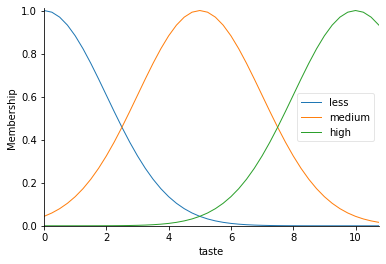

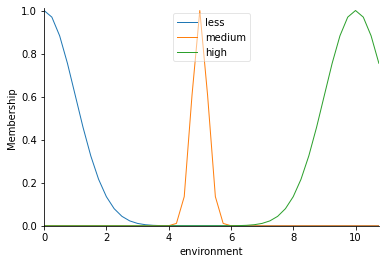

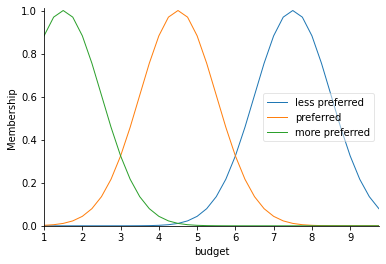

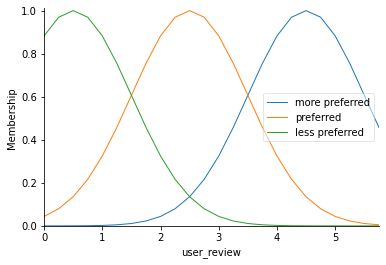

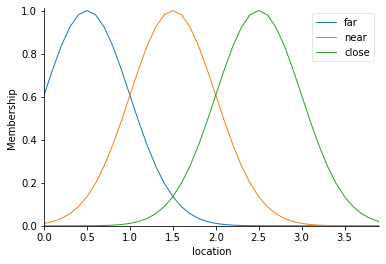

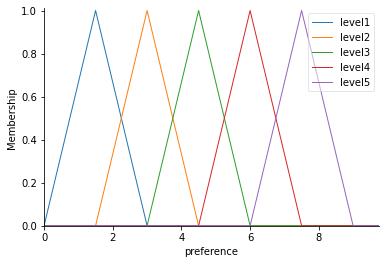

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


taste = ctrl.Antecedent(np.arange(0,11,0.25),'taste')
environment = ctrl.Antecedent(np.arange(0,11,0.25),'environment')
budget = ctrl.Antecedent(np.arange(1,10,0.25),'budget')
user_review = ctrl.Antecedent(np.arange(0,6,0.25),'user_review')
location = ctrl.Antecedent(np.arange(0,4,0.1),'location')

preference= ctrl.Consequent(np.arange(0,10,0.25),'preference')

taste['less']=fuzz.gaussmf(taste.universe,0,2)
taste['medium']=fuzz.gaussmf(taste.universe,5,2)
taste['high']=fuzz.gaussmf(taste.universe,10,2)

environment['less']=fuzz.gaussmf(environment.universe,0,1)
environment['medium']=fuzz.gaussmf(environment.universe,5,0.25)
environment['high']=fuzz.gaussmf(environment.universe,10,1)

budget['less preferred']=fuzz.gaussmf(budget.universe,7.5,1)
budget['preferred']=fuzz.gaussmf(budget.universe,4.5,1)
budget['more preferred']=fuzz.gaussmf(budget.universe,1.5,1)

user_review['more preferred']=fuzz.gaussmf(user_review.universe,4.5,1)
user_review['preferred']=fuzz.gaussmf(user_review.universe,2.5,1)
user_review['less preferred']=fuzz.gaussmf(user_review.universe,0.5,1)

location['far']=fuzz.gaussmf(location.universe,0.5,0.5)
location['near']=fuzz.gaussmf(location.universe,1.5,0.5)
location['close']=fuzz.gaussmf(location.universe,2.5,0.5)

preference['level1']=fuzz.trimf(preference.universe,[0,1.5,3])
preference['level2']=fuzz.trimf(preference.universe,[1.5,3,4.5])
preference['level3']=fuzz.trimf(preference.universe,[3,4.5,6])
preference['level4']=fuzz.trimf(preference.universe,[4.5,6,7.5])
preference['level5']=fuzz.trimf(preference.universe,[6,7.5,9])

rule= []

list_value_taste = [' ','less','medium','high']
list_value_environment = [' ','less','medium','high']
list_value_budget=[' ','less preferred','preferred','more preferred']
list_value_user_review = [' ','less preferred','preferred','more preferred']
list_value_location = [' ','far','near','close']

list_value_preference=['level1','level2','level3','level4','level5']

for index_taste in range(1,4):
  for index_environment in range (1,4):
    for index_budget in range(1,4):
      for index_user_review in range (1,4):
        for index_location in range (1,4):
          t = index_budget + index_environment + index_location + index_taste + index_user_review
          if(t<=3): k=0
          if(3<t<=6): k =1
          if(6<t<=9): k=2
          if(9<t<=12):k=3
          if(12<t<=15):k=4
          rule.append(ctrl.Rule(taste[list_value_taste[index_taste]]&environment[list_value_environment[index_environment]]
                                &budget[list_value_budget[index_budget]]&user_review[list_value_user_review[index_user_review]]
                                &location[list_value_location[index_location]],preference[list_value_preference[k]]))

preferencing_ctrl = ctrl.ControlSystem(rule)
preferencing=ctrl.ControlSystemSimulation(preferencing_ctrl)
preferencing.input['taste']=7
preferencing.input['environment']=7
preferencing.input['budget']=7
preferencing.input['user_review']=5
preferencing.input['location']=2
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)


taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()
